In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('Telecom Churn Prediction.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [5]:
df = df.drop((['customerID']), axis=1)

In [6]:
df['TotalCharges']=df['TotalCharges'].replace({' ': 0})

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


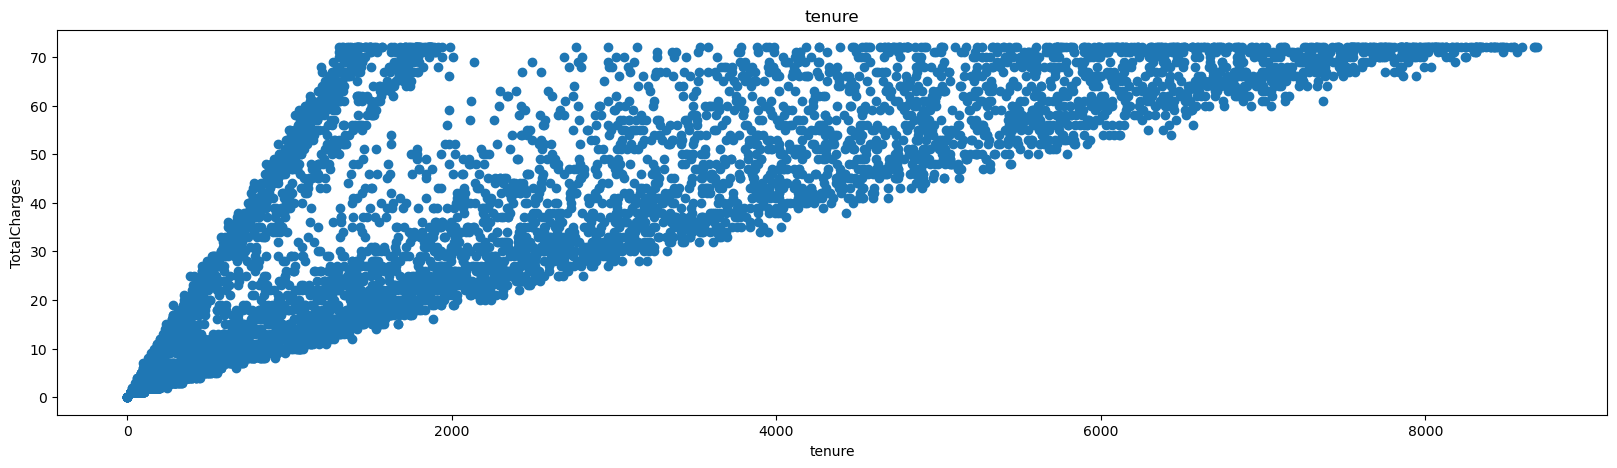

In [9]:
plt.figure(figsize=(20, 5))

features = ['tenure']
target = df['TotalCharges']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    y = df[col]
    x = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('TotalCharges')

In [10]:
for i in df:
    print(df[i].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
df['Churn']=df['Churn'].replace({'No': 0,'Yes':1})

In [13]:
numeric_cols = df._get_numeric_data().columns
print(numeric_cols)
categ_cols = list(set(df.columns) - set(numeric_cols))
categ_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')


['StreamingTV',
 'TechSupport',
 'Contract',
 'OnlineBackup',
 'gender',
 'PhoneService',
 'Dependents',
 'PaymentMethod',
 'MultipleLines',
 'InternetService',
 'Partner',
 'PaperlessBilling',
 'StreamingMovies',
 'DeviceProtection',
 'OnlineSecurity']

In [14]:
for i in categ_cols:
    print(df[i].value_counts())
    print('\n')

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


gender
Male      3555
Female    3488
Name: count, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    30

In [15]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
for i in categ_cols:
    df[i] = lb.fit_transform(df[i])

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


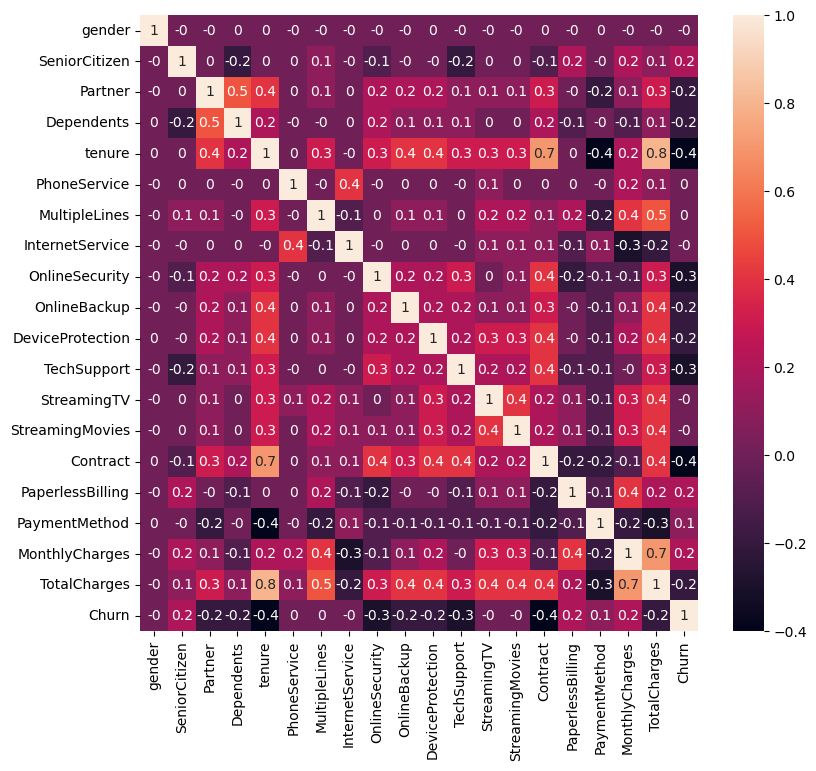

In [17]:
plt.figure(figsize = (9,8))
dataplot = sns.heatmap(df.corr().round(1), annot=True) 
plt.show()

In [18]:
df2 = df.drop((['gender','PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies']), axis=1)

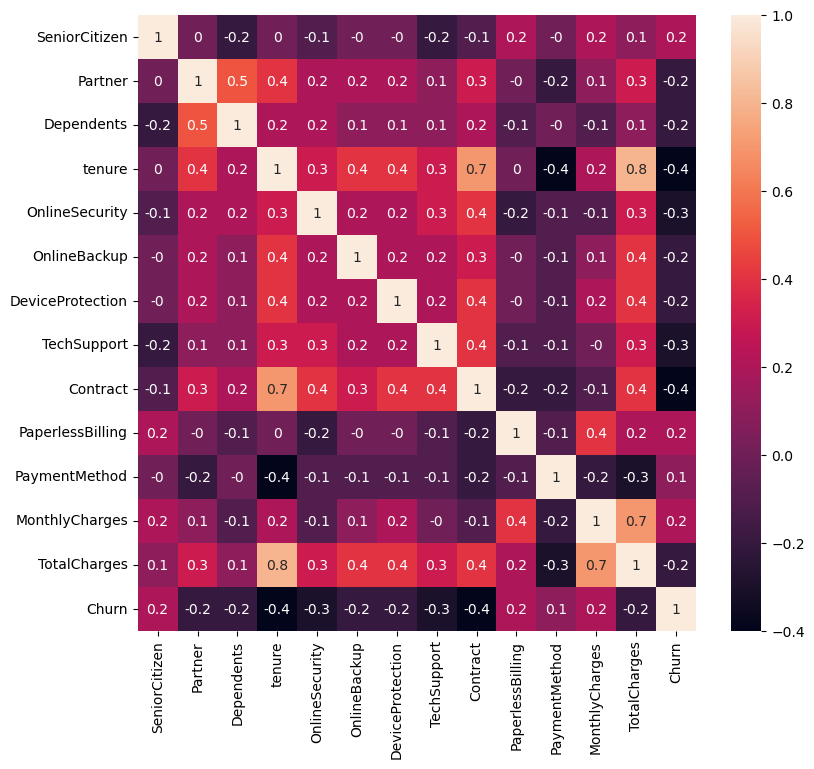

In [19]:
plt.figure(figsize = (9,8))
dataplot = sns.heatmap(df2.corr().round(1), annot=True) 
plt.show()

In [20]:
#Tenure Vs. Total Charges 
#Tenure Vs. Contract

In [21]:
df2.corr()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,-0.128221,-0.013632,-0.021398,-0.151268,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,0.150828,0.153130,0.166330,0.126733,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,0.152166,0.091015,0.080537,0.133524,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.325468,0.370876,0.371105,0.322942,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229
OnlineSecurity,-0.128221,0.150828,0.152166,0.325468,1.000000,0.185126,0.175985,0.285028,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309
OnlineBackup,-0.013632,0.153130,0.091015,0.370876,0.185126,1.000000,0.187757,0.195748,0.280980,-0.013370,-0.124847,0.119777,0.374410,-0.195525
DeviceProtection,-0.021398,0.166330,0.080537,0.371105,0.175985,0.187757,1.000000,0.240593,0.350277,-0.038234,-0.135750,0.163652,0.387897,-0.178134
TechSupport,-0.151268,0.126733,0.133524,0.322942,0.285028,0.195748,0.240593,1.000000,0.425367,-0.113600,-0.104670,-0.008682,0.275625,-0.282492
Contract,-0.142554,0.294806,0.243187,0.671607,0.374416,0.280980,0.350277,0.425367,1.000000,-0.176733,-0.227543,-0.074195,0.446855,-0.396713
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,-0.157641,-0.013370,-0.038234,-0.113600,-0.176733,1.000000,-0.062904,0.352150,0.158574,0.191825


In [22]:
for i in df2:
    print(i)

SeniorCitizen
Partner
Dependents
tenure
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


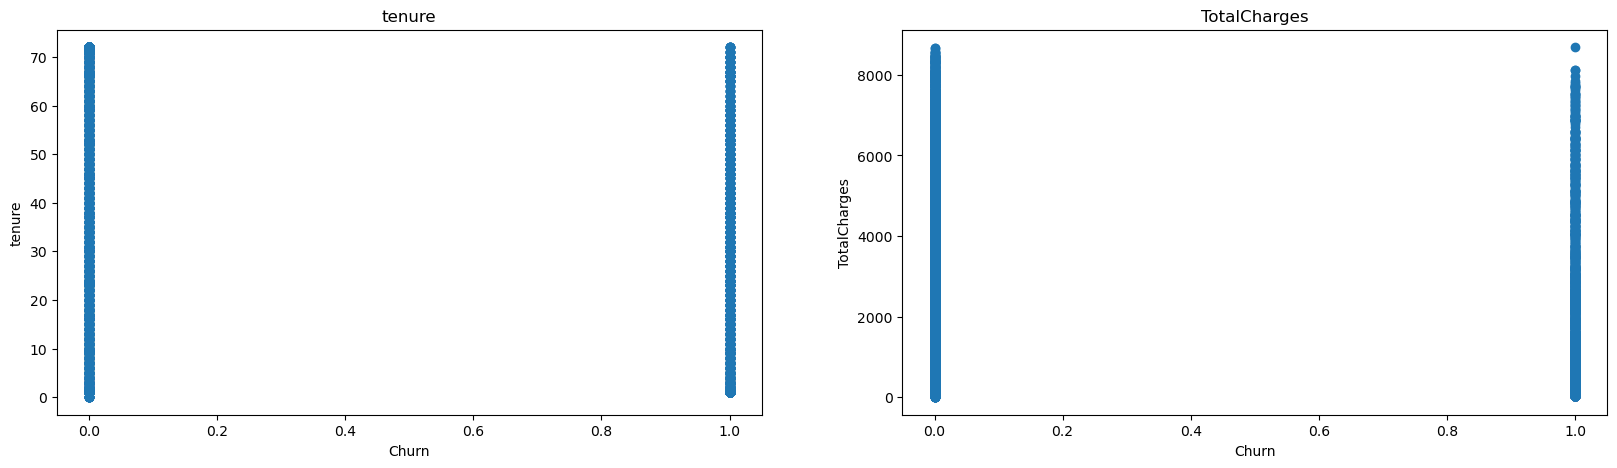

In [23]:
plt.figure(figsize=(20, 5))

features = ['tenure','TotalCharges']
target = df2['Churn']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    y = df2[col]
    x = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel('Churn')
    plt.ylabel(col)

In [24]:
from imblearn.over_sampling import RandomOverSampler

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)